In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
df = pd.read_csv('/content/breast-cancer - Copy.csv')


In [ ]:
import pandas as pd

# Select only the numerical columns for calculation, excluding 'id' and 'diagnosis'
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the statistics
stats = {
    'Missing Values': df[numerical_cols].isnull().sum(),
    'Min': df[numerical_cols].min(),
    'Max': df[numerical_cols].max(),
    'Median': df[numerical_cols].median(),
    'Mean': df[numerical_cols].mean(),
    'Std Dev': df[numerical_cols].std()
}

# Create a DataFrame from the statistics
stats_df = pd.DataFrame(stats)

# Display the DataFrame
display(stats_df)

,Missing Values,Min,Max,Median,Mean,Std Dev
id,0,8670.000000,9.113205e+08,909410.000000,3.354886e+07,1.367971e+08
radius_mean,0,6.981000,2.811000e+01,13.140000,1.400431e+01,3.551426e+00
texture_mean,0,9.710000,3.928000e+01,18.610000,1.918808e+01,4.391565e+00
perimeter_mean,0,43.790000,1.885000e+02,84.550000,9.101569e+01,2.444664e+01
area_mean,0,143.500000,2.501000e+03,536.900000,6.446582e+02,3.577879e+02
smoothness_mean,0,0.052630,1.634000e-01,0.094340,9.514537e-02,1.396749e-02
compactness_mean,0,0.019380,3.114000e-01,0.085970,9.960333e-02,4.966678e-02
concavity_mean,0,0.000000,4.268000e-01,0.055000,8.337068e-02,7.886724e-02
concave points_mean,0,0.000000,2.012000e-01,0.030780,4.577882e-02,3.825138e-02
symmetry_mean,0,0.106000,2.678000e-01,0.177000,1.786957e-01,2.594728e-02


## Count benign and malignant cases

### Subtask:
Count the occurrences of 'B' (Benign) and 'M' (Malignant) in the 'diagnosis' column.


**Reasoning**:
Count the occurrences of 'B' and 'M' in the 'diagnosis' column.



In [ ]:
diagnosis_counts = df['diagnosis'].value_counts()
print(diagnosis_counts)

diagnosis
B    321
M    148
Name: count, dtype: int64


In [ ]:
print(df.isnull().sum())
df.info()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entri

## Data cleaning

### Subtask:
Remove any duplicate rows or irrelevant columns.


**Reasoning**:
Check for and remove duplicate rows, then remove the 'id' column as it is not relevant for the analysis.



In [ ]:
df.drop_duplicates(inplace=True)
df.drop('id', axis=1, inplace=True)
print(f"Shape of the dataframe after removing duplicates and 'id' column: {df.shape}")

Shape of the dataframe after removing duplicates and 'id' column: (469, 31)


# Task
Handle outliers in the dataset.

## Identify outliers

### Subtask:
Use appropriate methods (e.g., IQR or Z-score) to identify outliers in the numerical columns.


**Reasoning**:
Calculate IQR, and define upper and lower bounds to identify outliers in numerical columns using the IQR method.



In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = {}
for col in numerical_cols:
    outliers[col] = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])][col]

# Print the number of outliers per column
for col, outlier_series in outliers.items():
    print(f"Number of outliers in {col}: {len(outlier_series)}")

Number of outliers in radius_mean: 18
Number of outliers in texture_mean: 8
Number of outliers in perimeter_mean: 14
Number of outliers in area_mean: 36
Number of outliers in smoothness_mean: 8
Number of outliers in compactness_mean: 12
Number of outliers in concavity_mean: 22
Number of outliers in concave points_mean: 17
Number of outliers in symmetry_mean: 11
Number of outliers in fractal_dimension_mean: 13
Number of outliers in radius_se: 38
Number of outliers in texture_se: 17
Number of outliers in perimeter_se: 33
Number of outliers in area_se: 54
Number of outliers in smoothness_se: 28
Number of outliers in compactness_se: 20
Number of outliers in concavity_se: 23
Number of outliers in concave points_se: 14
Number of outliers in symmetry_se: 19
Number of outliers in fractal_dimension_se: 23
Number of outliers in radius_worst: 25
Number of outliers in texture_worst: 8
Number of outliers in perimeter_worst: 21
Number of outliers in area_worst: 42
Number of outliers in smoothness_wo

## Handle outliers

### Subtask:
Decide on a strategy to handle the identified outliers (e.g., removal, capping, or transformation).


**Reasoning**:
Iterate through the identified outliers and apply capping to the corresponding columns in the dataframe.



In [ ]:
# Apply capping to the identified outliers
for col, outlier_series in outliers.items():
    if not outlier_series.empty:
        df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

print("Outliers have been handled by capping.")

Outliers have been handled by capping.


## Verify outlier handling

### Subtask:
Check the data for outliers after handling to ensure the process was successful.


**Reasoning**:
Select numerical columns, calculate quartiles, IQR, bounds, and then identify and print the number of outliers for each column to verify outlier handling.



In [ ]:
# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate IQR
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers after capping
outliers_after_capping = {}
for col in numerical_cols:
    outliers_after_capping[col] = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])][col]

# Print the number of outliers per column after capping
print("Number of outliers per column after capping:")
for col, outlier_series in outliers_after_capping.items():
    print(f"Number of outliers in {col}: {len(outlier_series)}")

Number of outliers per column after capping:
Number of outliers in radius_mean: 0
Number of outliers in texture_mean: 0
Number of outliers in perimeter_mean: 0
Number of outliers in area_mean: 0
Number of outliers in smoothness_mean: 0
Number of outliers in compactness_mean: 0
Number of outliers in concavity_mean: 0
Number of outliers in concave points_mean: 0
Number of outliers in symmetry_mean: 0
Number of outliers in fractal_dimension_mean: 0
Number of outliers in radius_se: 0
Number of outliers in texture_se: 0
Number of outliers in perimeter_se: 0
Number of outliers in area_se: 0
Number of outliers in smoothness_se: 0
Number of outliers in compactness_se: 0
Number of outliers in concavity_se: 0
Number of outliers in concave points_se: 0
Number of outliers in symmetry_se: 0
Number of outliers in fractal_dimension_se: 0
Number of outliers in radius_worst: 0
Number of outliers in texture_worst: 0
Number of outliers in perimeter_worst: 0
Number of outliers in area_worst: 0
Number of o

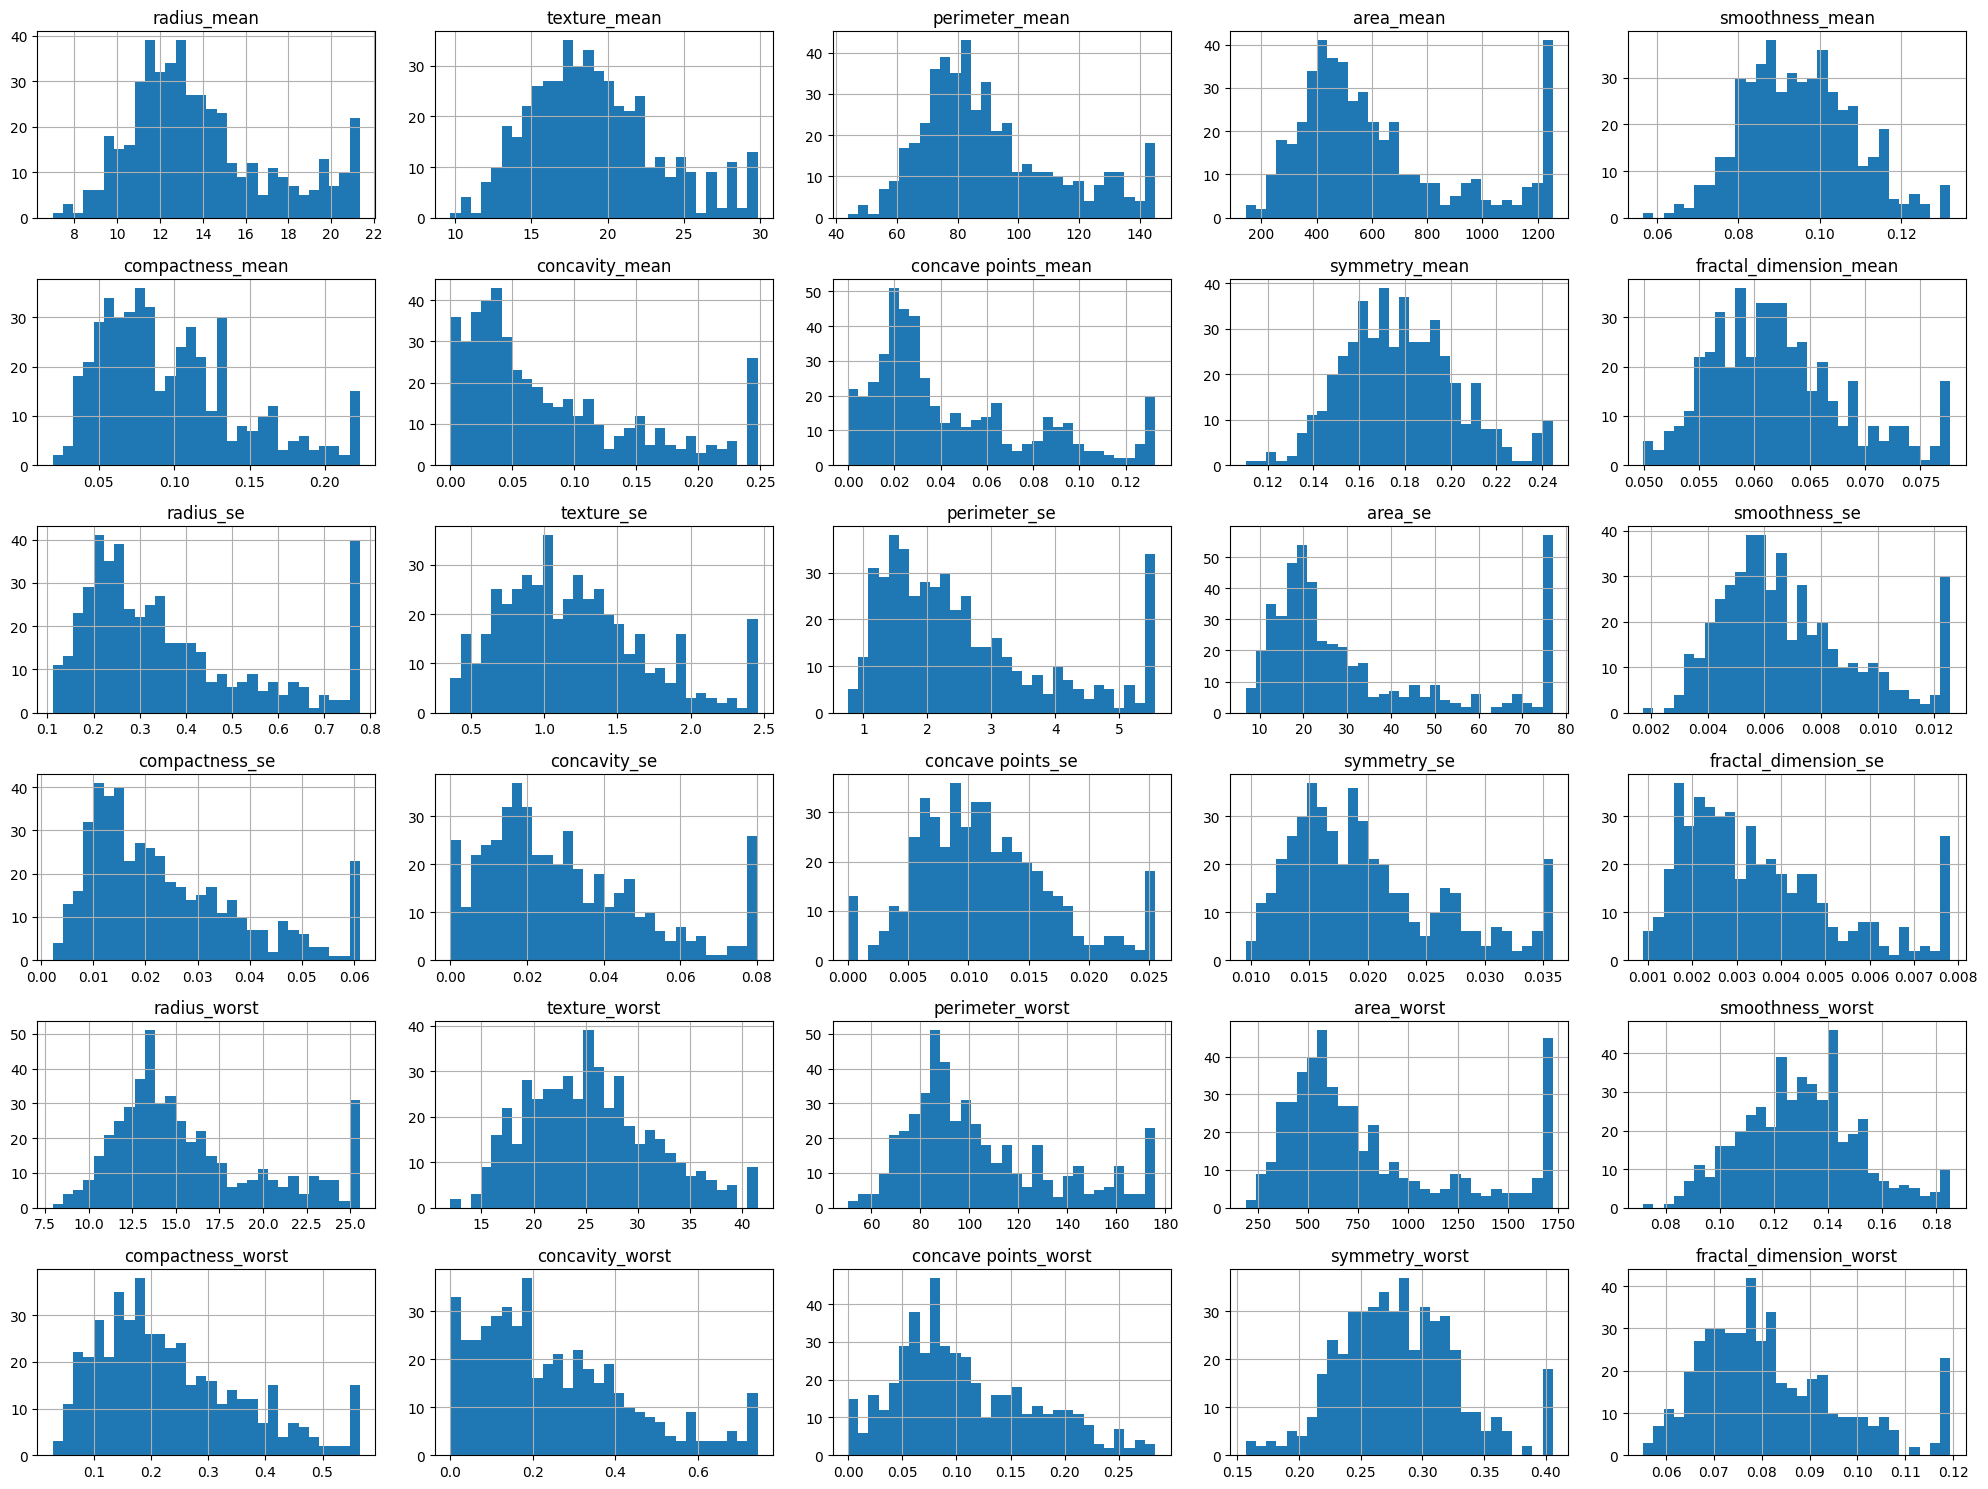

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numerical columns for plotting
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical columns
df[numerical_cols].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Task
Perform data splitting, feature scaling, and train and evaluate Logistic Regression, Random Forest, SVM, KNN, and Neural Network models on the dataset. Compare the performance of the models and identify the best-performing one.

## Data splitting

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using `train_test_split`.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (375, 30)
Shape of X_test: (94, 30)
Shape of y_train: (375,)
Shape of y_test: (94,)


## Feature scaling

### Subtask:
Apply feature scaling techniques (e.g., standardization or normalization) to the numerical features.


**Reasoning**:
Apply StandardScaler to the training and testing data.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

X_train_scaled shape: (375, 30)
X_test_scaled shape: (94, 30)


## Model training and evaluation




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a dictionary to store the results
results = {}

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
results['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test, lr_pred),
    'Precision': precision_score(y_test, lr_pred, pos_label='M'),
    'Recall': recall_score(y_test, lr_pred, pos_label='M'),
    'F1 Score': f1_score(y_test, lr_pred, pos_label='M'),
    'AUC': roc_auc_score(y_test, lr_model.predict_proba(X_test_scaled)[:, 1])
}

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, rf_pred),
    'Precision': precision_score(y_test, rf_pred, pos_label='M'),
    'Recall': recall_score(y_test, rf_pred, pos_label='M'),
    'F1 Score': f1_score(y_test, rf_pred, pos_label='M'),
    'AUC': roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
}

# Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)
results['SVM'] = {
    'Accuracy': accuracy_score(y_test, svm_pred),
    'Precision': precision_score(y_test, svm_pred, pos_label='M'),
    'Recall': recall_score(y_test, svm_pred, pos_label='M'),
    'F1 Score': f1_score(y_test, svm_pred, pos_label='M'),
    'AUC': roc_auc_score(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
}

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
results['KNN'] = {
    'Accuracy': accuracy_score(y_test, knn_pred),
    'Precision': precision_score(y_test, knn_pred, pos_label='M'),
    'Recall': recall_score(y_test, knn_pred, pos_label='M'),
    'F1 Score': f1_score(y_test, knn_pred, pos_label='M'),
    'AUC': roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
}

# Neural Network
nn_model = MLPClassifier(random_state=42, max_iter=1000)
nn_model.fit(X_train_scaled, y_train)
nn_pred = nn_model.predict(X_test_scaled)
results['Neural Network'] = {
    'Accuracy': accuracy_score(y_test, nn_pred),
    'Precision': precision_score(y_test, nn_pred, pos_label='M'),
    'Recall': recall_score(y_test, nn_pred, pos_label='M'),
    'F1 Score': f1_score(y_test, nn_pred, pos_label='M'),
    'AUC': roc_auc_score(y_test, nn_model.predict_proba(X_test_scaled)[:, 1])
}

# Print the results
print(results)

{'Logistic Regression': {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'AUC': np.float64(1.0)}, 'Random Forest': {'Accuracy': 0.9787234042553191, 'Precision': 1.0, 'Recall': 0.9523809523809523, 'F1 Score': 0.975609756097561, 'AUC': np.float64(0.9995421245421245)}, 'SVM': {'Accuracy': 0.9787234042553191, 'Precision': 1.0, 'Recall': 0.9523809523809523, 'F1 Score': 0.975609756097561, 'AUC': np.float64(0.9990842490842491)}, 'KNN': {'Accuracy': 0.9680851063829787, 'Precision': 1.0, 'Recall': 0.9285714285714286, 'F1 Score': 0.9629629629629629, 'AUC': np.float64(0.9977106227106227)}, 'Neural Network': {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'AUC': np.float64(1.0)}}


## Logistic Regression Evaluation

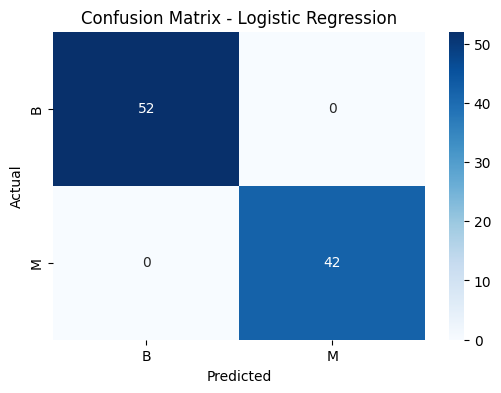

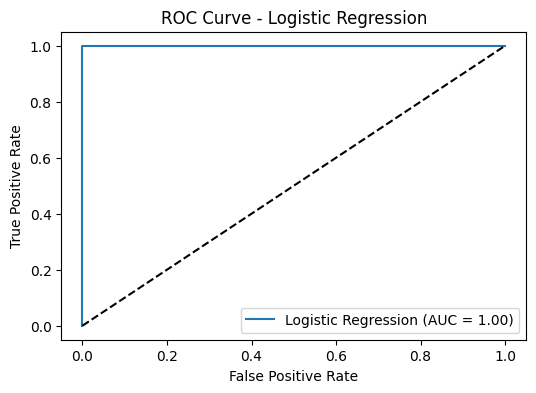

Logistic Regression Results:
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'AUC': np.float64(1.0)}


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# ROC Curve and AUC for Logistic Regression
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probs, pos_label='M')
lr_auc = roc_auc_score(y_test, lr_probs)

plt.figure(figsize=(6, 4))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()

print("Logistic Regression Results:")
print(results['Logistic Regression'])

## Random Forest Evaluation

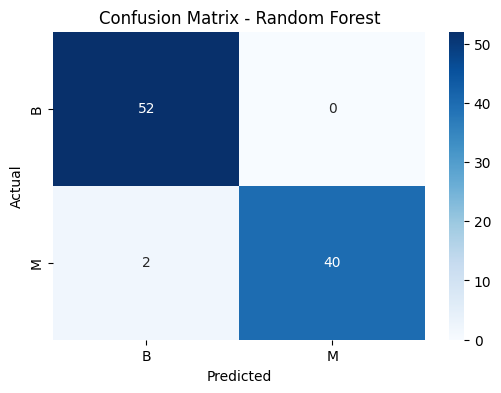

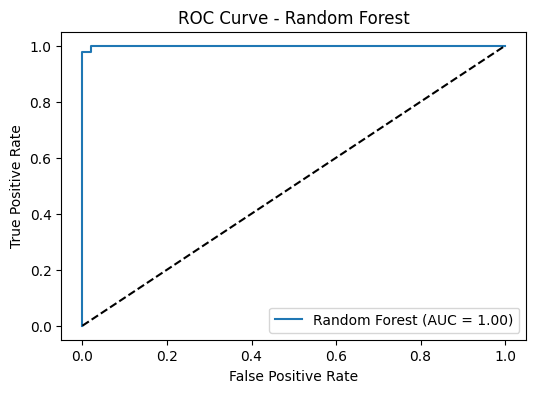

Random Forest Results:
{'Accuracy': 0.9787234042553191, 'Precision': 1.0, 'Recall': 0.9523809523809523, 'F1 Score': 0.975609756097561, 'AUC': np.float64(0.9995421245421245)}


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC Curve and AUC for Random Forest
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs, pos_label='M')
rf_auc = roc_auc_score(y_test, rf_probs)

plt.figure(figsize=(6, 4))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

print("Random Forest Results:")
print(results['Random Forest'])

## SVM Evaluation

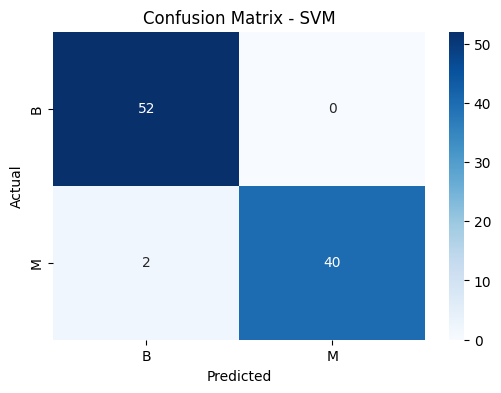

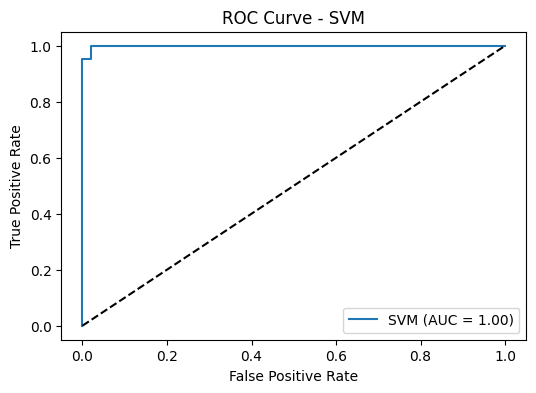

SVM Results:
{'Accuracy': 0.9787234042553191, 'Precision': 1.0, 'Recall': 0.9523809523809523, 'F1 Score': 0.975609756097561, 'AUC': np.float64(0.9990842490842491)}


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for SVM
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

# ROC Curve and AUC for SVM
svm_probs = svm_model.predict_proba(X_test_scaled)[:, 1]
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_probs, pos_label='M')
svm_auc = roc_auc_score(y_test, svm_probs)

plt.figure(figsize=(6, 4))
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend()
plt.show()

print("SVM Results:")
print(results['SVM'])

## KNN Evaluation

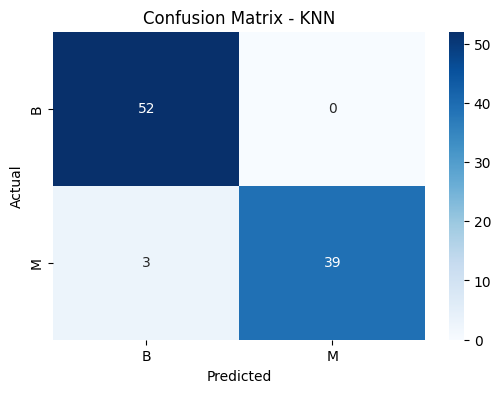

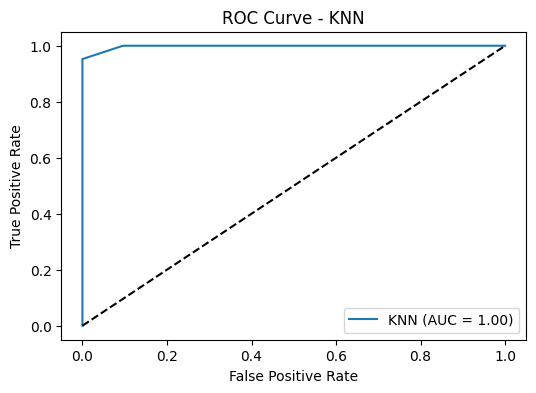

KNN Results:
{'Accuracy': 0.9680851063829787, 'Precision': 1.0, 'Recall': 0.9285714285714286, 'F1 Score': 0.9629629629629629, 'AUC': np.float64(0.9977106227106227)}


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for KNN
knn_cm = confusion_matrix(y_test, knn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

# ROC Curve and AUC for KNN
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_probs, pos_label='M')
knn_auc = roc_auc_score(y_test, knn_probs)

plt.figure(figsize=(6, 4))
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()

print("KNN Results:")
print(results['KNN'])

## Neural Network Evaluation

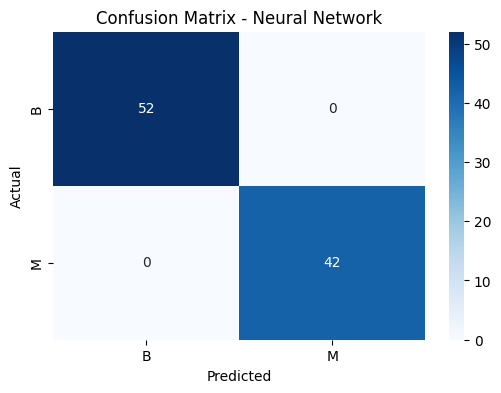

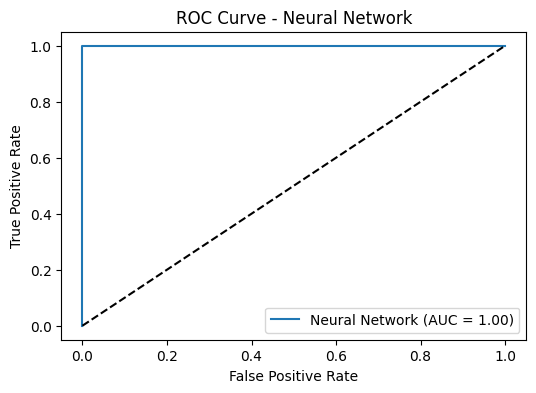

Neural Network Results:
{'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0, 'AUC': np.float64(1.0)}


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix for Neural Network
nn_cm = confusion_matrix(y_test, nn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()

# ROC Curve and AUC for Neural Network
nn_probs = nn_model.predict_proba(X_test_scaled)[:, 1]
nn_fpr, nn_tpr, nn_thresholds = roc_curve(y_test, nn_probs, pos_label='M')
nn_auc = roc_auc_score(y_test, nn_probs)

plt.figure(figsize=(6, 4))
plt.plot(nn_fpr, nn_tpr, label=f'Neural Network (AUC = {nn_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network')
plt.legend()
plt.show()

print("Neural Network Results:")
print(results['Neural Network'])

## Model comparison sa train




In [ ]:
results_df = pd.DataFrame(results).T
display(results_df)

,Accuracy,Precision,Recall,F1 Score,AUC
Logistic Regression,1.000000,1.0,1.000000,1.000000,1.000000
Random Forest,0.978723,1.0,0.952381,0.975610,0.999542
SVM,0.978723,1.0,0.952381,0.975610,0.999084
KNN,0.968085,1.0,0.928571,0.962963,0.997711
Neural Network,1.000000,1.0,1.000000,1.000000,1.000000


## cross validation 5 folds kay nag duda ko sa buang:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np

# Dictionary to store results
cv_results = {}

# Define models
models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Neural Network': nn_model
}

# Map target variable to numerical values for cross-validation
y_train_numeric = y_train.map({'M': 1, 'B': 0})

# Define scoring metrics - REMOVED needs_proba
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1),
    'roc_auc': 'roc_auc'  # Use string instead - sklearn handles it automatically
}

# Evaluate each model with multiple metrics
for name, model in models.items():
    cv_scores = {}
    for metric_name, scorer in scoring.items():
        scores = cross_val_score(model, X_train_scaled, y_train_numeric, cv=5, scoring=scorer)
        cv_scores[metric_name] = scores.mean()

    cv_results[name] = cv_scores

# Print results neatly
print("Cross-validation Results (5-fold):")
for name, scores in cv_results.items():
    print(f"\n{name}:")
    for metric, value in scores.items():
        print(f"  {metric.capitalize()}: {value:.4f}")

Cross-validation Results (5-fold):

Logistic Regression:
  Accuracy: 0.9627
  Precision: 0.9537
  Recall: 0.9147
  F1: 0.9322
  Roc_auc: 0.9928

Random Forest:
  Accuracy: 0.9547
  Precision: 0.9561
  Recall: 0.8866
  F1: 0.9185
  Roc_auc: 0.9880

SVM:
  Accuracy: 0.9760
  Precision: 0.9809
  Recall: 0.9338
  F1: 0.9560
  Roc_auc: 0.9945

KNN:
  Accuracy: 0.9493
  Precision: 0.9700
  Recall: 0.8494
  F1: 0.9044
  Roc_auc: 0.9755

Neural Network:
  Accuracy: 0.9653
  Precision: 0.9552
  Recall: 0.9238
  F1: 0.9373
  Roc_auc: 0.9922


##bali kanang results sa taas murag MAO nagyud kay gi verify kuno siyag ika lima

In [ ]:
print(df.describe)

<bound method NDFrame.describe of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M       14.420         19.77           94.48     642.50   
1           M       13.610         24.98           88.05     582.70   
2           B        6.981         13.43           43.79     143.50   
3           B       12.180         20.52           77.22     458.70   
4           B        9.876         19.40           63.95     298.30   
..        ...          ...           ...             ...        ...   
464         M       21.350         22.39          142.00    1254.35   
465         M       20.130         28.25          131.20    1254.35   
466         M       16.600         28.08          108.30     858.10   
467         M       20.600         29.33          140.10    1254.35   
468         B        7.760         24.54           47.92     181.00   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.097520           0.1

## Load ang testing dataset




In [ ]:
import pandas as pd

df_test = pd.read_csv('/content/Breast_Cancer_For_Testing.csv')
display(df_test.head())
display(df_test.info())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       100 non-null    int64  
 1   diagnosis                100 non-null    object 
 2   radius_mean              100 non-null    float64
 3   texture_mean             100 non-null    float64
 4   perimeter_mean           100 non-null    float64
 5   area_mean                100 non-null    float64
 6   smoothness_mean          100 non-null    float64
 7   compactness_mean         100 non-null    float64
 8   concavity_mean           100 non-null    float64
 9   concave points_mean      100 non-null    float64
 10  symmetry_mean            100 non-null    float64
 11  fractal_dimension_mean   100 non-null    float64
 12  radius_se                100 non-null    float64
 13  texture_se               100 non-null    float64
 14  perimeter_se             10

None

In [ ]:
df_test['diagnosis'] = df_test['diagnosis'].map({'M': 1, 'B': 0})
print(df_test['diagnosis'].value_counts())

diagnosis
1    64
0    36
Name: count, dtype: int64


In [ ]:
# Select the same feature columns as used for training
X_test_new = df_test[X_train.columns]

print("Shape of X_test_new:", X_test_new.shape)

Shape of X_test_new: (100, 30)


In [ ]:
# Scale the new test data using the fitted scaler
X_test_new_scaled = scaler.transform(X_test_new)

print("Shape of X_test_new_scaled:", X_test_new_scaled.shape)

Shape of X_test_new_scaled: (100, 30)


## Evaluate Logistic Regression on Test Dataa



Logistic Regression Results on Test Data:
{'Accuracy': 0.96, 'Precision': 0.9838709677419355, 'Recall': 0.953125, 'F1 Score': 0.9682539682539683, 'AUC': np.float64(0.9947916666666667)}


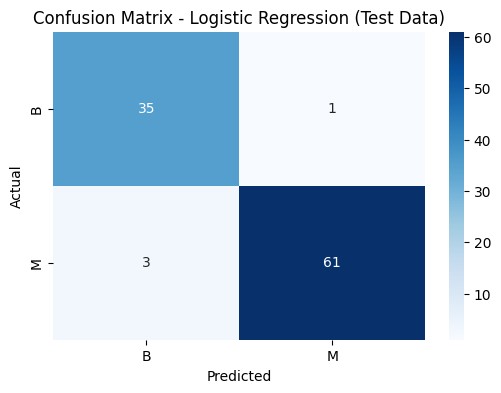

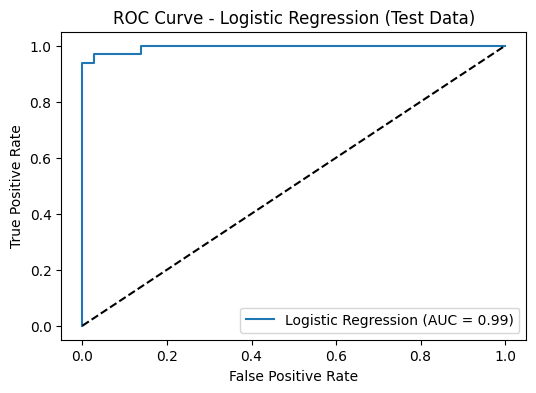

In [ ]:
# Make predictions with the Logistic Regression model
lr_pred_new = lr_model.predict(X_test_new_scaled)
y_test_new = df_test['diagnosis']

# Convert predictions to match the new test data labels (0 and 1)
lr_pred_new_numeric = [1 if pred == 'M' else 0 for pred in lr_pred_new]

# Evaluate the model
results_new = {}
results_new['Logistic Regression'] = {
    'Accuracy': accuracy_score(y_test_new, lr_pred_new_numeric),
    'Precision': precision_score(y_test_new, lr_pred_new_numeric, pos_label=1),
    'Recall': recall_score(y_test_new, lr_pred_new_numeric, pos_label=1),
    'F1 Score': f1_score(y_test_new, lr_pred_new_numeric, pos_label=1),
    'AUC': roc_auc_score(y_test_new, lr_model.predict_proba(X_test_new_scaled)[:, 1])
}

# Print the results
print("Logistic Regression Results on Test Data:")
print(results_new['Logistic Regression'])

# Confusion Matrix for Logistic Regression on Test Data
lr_cm_new = confusion_matrix(y_test_new, lr_pred_new_numeric)
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression (Test Data)')
plt.show()

# ROC Curve and AUC for Logistic Regression on Test Data
lr_probs_new = lr_model.predict_proba(X_test_new_scaled)[:, 1]
lr_fpr_new, lr_tpr_new, lr_thresholds_new = roc_curve(y_test_new, lr_probs_new, pos_label=1)
lr_auc_new = roc_auc_score(y_test_new, lr_probs_new)

plt.figure(figsize=(6, 4))
plt.plot(lr_fpr_new, lr_tpr_new, label=f'Logistic Regression (AUC = {lr_auc_new:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression (Test Data)')
plt.legend()
plt.show()

## Evaluate Random Forest on Test Data



Random Forest Results on Test Data:
{'Accuracy': 0.92, 'Precision': 0.9666666666666667, 'Recall': 0.90625, 'F1 Score': 0.9354838709677419, 'AUC': np.float64(0.9845920138888888)}


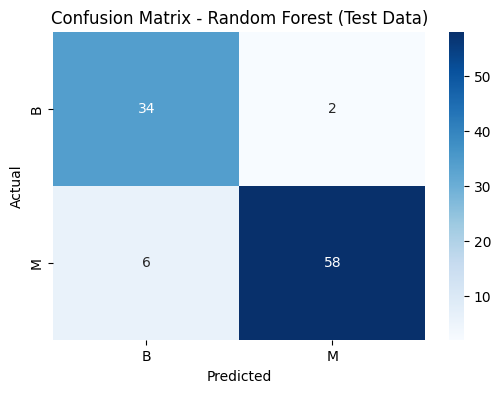

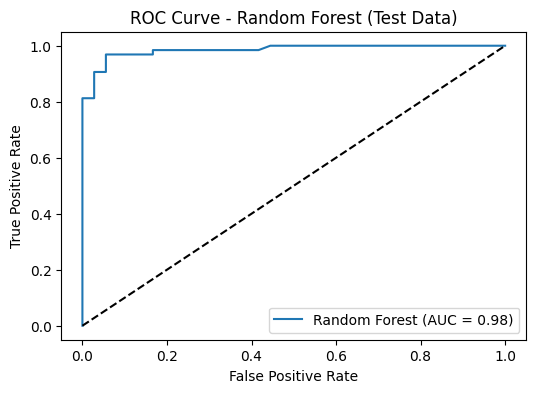

In [ ]:
# Make predictions with the Random Forest model
rf_pred_new = rf_model.predict(X_test_new_scaled)
y_test_new = df_test['diagnosis']

# Convert predictions to match the new test data labels (0 and 1)
rf_pred_new_numeric = [1 if pred == 'M' else 0 for pred in rf_pred_new]

# Evaluate the model
results_new['Random Forest'] = {
    'Accuracy': accuracy_score(y_test_new, rf_pred_new_numeric),
    'Precision': precision_score(y_test_new, rf_pred_new_numeric, pos_label=1),
    'Recall': recall_score(y_test_new, rf_pred_new_numeric, pos_label=1),
    'F1 Score': f1_score(y_test_new, rf_pred_new_numeric, pos_label=1),
    'AUC': roc_auc_score(y_test_new, rf_model.predict_proba(X_test_new_scaled)[:, 1])
}

# Print the results
print("Random Forest Results on Test Data:")
print(results_new['Random Forest'])

# Confusion Matrix for Random Forest on Test Data
rf_cm_new = confusion_matrix(y_test_new, rf_pred_new_numeric)
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (Test Data)')
plt.show()

# ROC Curve and AUC for Random Forest on Test Data
rf_probs_new = rf_model.predict_proba(X_test_new_scaled)[:, 1]
rf_fpr_new, rf_tpr_new, rf_thresholds_new = roc_curve(y_test_new, rf_probs_new, pos_label=1)
rf_auc_new = roc_auc_score(y_test_new, rf_probs_new)

plt.figure(figsize=(6, 4))
plt.plot(rf_fpr_new, rf_tpr_new, label=f'Random Forest (AUC = {rf_auc_new:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Test Data)')
plt.legend()
plt.show()

## Evaluate SVM on Test Data



SVM Results on Test Data:
{'Accuracy': 0.93, 'Precision': 1.0, 'Recall': 0.890625, 'F1 Score': 0.9421487603305785, 'AUC': np.float64(0.9952256944444444)}


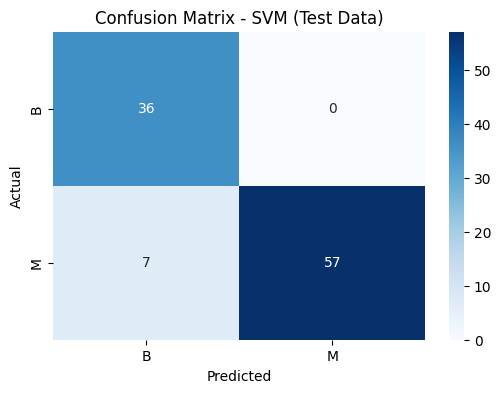

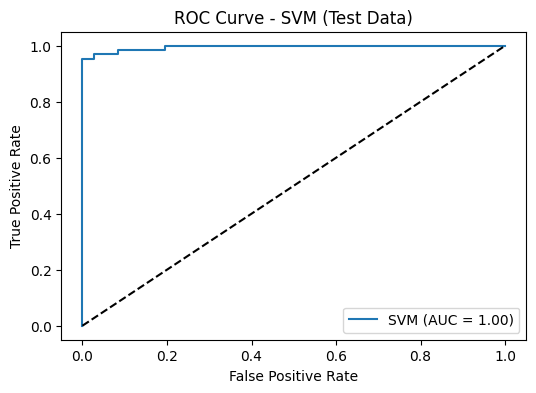

In [ ]:
# Make predictions with the SVM model
svm_pred_new = svm_model.predict(X_test_new_scaled)
y_test_new = df_test['diagnosis']

# Convert predictions to match the new test data labels (0 and 1)
svm_pred_new_numeric = [1 if pred == 'M' else 0 for pred in svm_pred_new]


# Evaluate the model
results_new['SVM'] = {
    'Accuracy': accuracy_score(y_test_new, svm_pred_new_numeric),
    'Precision': precision_score(y_test_new, svm_pred_new_numeric, pos_label=1),
    'Recall': recall_score(y_test_new, svm_pred_new_numeric, pos_label=1),
    'F1 Score': f1_score(y_test_new, svm_pred_new_numeric, pos_label=1),
    'AUC': roc_auc_score(y_test_new, svm_model.predict_proba(X_test_new_scaled)[:, 1])
}

# Print the results
print("SVM Results on Test Data:")
print(results_new['SVM'])

# Confusion Matrix for SVM on Test Data
svm_cm_new = confusion_matrix(y_test_new, svm_pred_new_numeric)
plt.figure(figsize=(6, 4))
sns.heatmap(svm_cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (Test Data)')
plt.show()

# ROC Curve and AUC for SVM on Test Data
svm_probs_new = svm_model.predict_proba(X_test_new_scaled)[:, 1]
svm_fpr_new, svm_tpr_new, svm_thresholds_new = roc_curve(y_test_new, svm_probs_new, pos_label=1)
svm_auc_new = roc_auc_score(y_test_new, svm_probs_new)

plt.figure(figsize=(6, 4))
plt.plot(svm_fpr_new, svm_tpr_new, label=f'SVM (AUC = {svm_auc_new:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Test Data)')
plt.legend()
plt.show()

## Evaluate KNN on Test Data



KNN Results on Test Data:
{'Accuracy': 0.93, 'Precision': 0.9830508474576272, 'Recall': 0.90625, 'F1 Score': 0.943089430894309, 'AUC': np.float64(0.9906684027777779)}


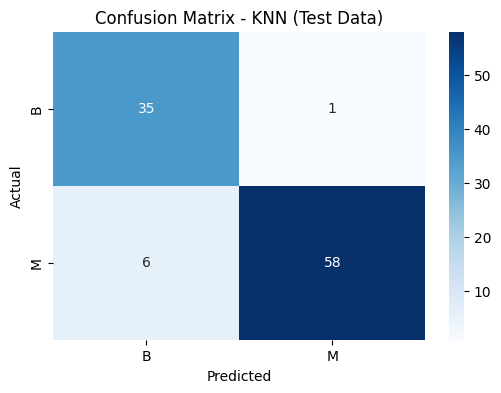

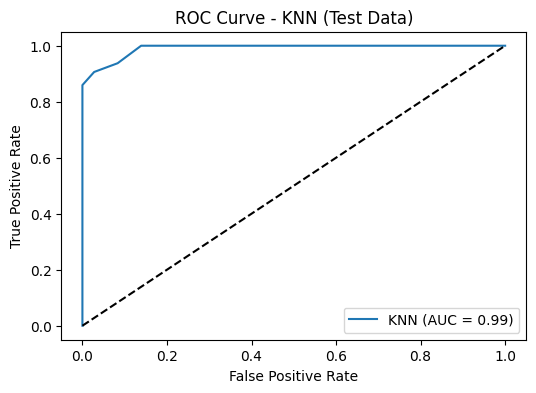

In [ ]:
# Make predictions with the KNN model
knn_pred_new = knn_model.predict(X_test_new_scaled)
y_test_new = df_test['diagnosis']

# Convert predictions to match the new test data labels (0 and 1)
knn_pred_new_numeric = [1 if pred == 'M' else 0 for pred in knn_pred_new]

# Evaluate the model
results_new['KNN'] = {
    'Accuracy': accuracy_score(y_test_new, knn_pred_new_numeric),
    'Precision': precision_score(y_test_new, knn_pred_new_numeric, pos_label=1),
    'Recall': recall_score(y_test_new, knn_pred_new_numeric, pos_label=1),
    'F1 Score': f1_score(y_test_new, knn_pred_new_numeric, pos_label=1),
    'AUC': roc_auc_score(y_test_new, knn_model.predict_proba(X_test_new_scaled)[:, 1])
}

# Print the results
print("KNN Results on Test Data:")
print(results_new['KNN'])

# Confusion Matrix for KNN on Test Data
knn_cm_new = confusion_matrix(y_test_new, knn_pred_new_numeric)
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN (Test Data)')
plt.show()

# ROC Curve and AUC for KNN on Test Data
knn_probs_new = knn_model.predict_proba(X_test_new_scaled)[:, 1]
knn_fpr_new, knn_tpr_new, knn_thresholds_new = roc_curve(y_test_new, knn_probs_new, pos_label=1)
knn_auc_new = roc_auc_score(y_test_new, knn_probs_new)

plt.figure(figsize=(6, 4))
plt.plot(knn_fpr_new, knn_tpr_new, label=f'KNN (AUC = {knn_auc_new:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN (Test Data)')
plt.legend()
plt.show()

## Evaluate Neural Network on Test Data



Neural Network Results on Test Data:
{'Accuracy': 0.98, 'Precision': 1.0, 'Recall': 0.96875, 'F1 Score': 0.9841269841269841, 'AUC': np.float64(0.9947916666666667)}


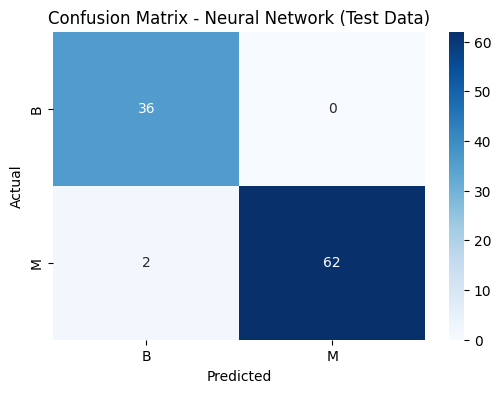

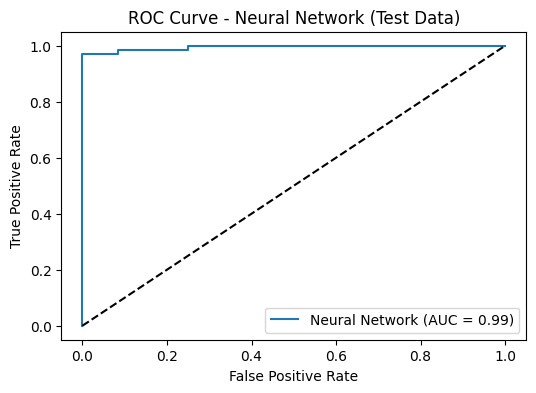

In [ ]:
# Make predictions with the Neural Network model
nn_pred_new = nn_model.predict(X_test_new_scaled)
y_test_new = df_test['diagnosis']

# Convert predictions to match the new test data labels (0 and 1)
nn_pred_new_numeric = [1 if pred == 'M' else 0 for pred in nn_pred_new]

# Evaluate the model
results_new['Neural Network'] = {
    'Accuracy': accuracy_score(y_test_new, nn_pred_new_numeric),
    'Precision': precision_score(y_test_new, nn_pred_new_numeric, pos_label=1),
    'Recall': recall_score(y_test_new, nn_pred_new_numeric, pos_label=1),
    'F1 Score': f1_score(y_test_new, nn_pred_new_numeric, pos_label=1),
    'AUC': roc_auc_score(y_test_new, nn_model.predict_proba(X_test_new_scaled)[:, 1])
}

# Print the results
print("Neural Network Results on Test Data:")
print(results_new['Neural Network'])

# Confusion Matrix for Neural Network on Test Data
nn_cm_new = confusion_matrix(y_test_new, nn_pred_new_numeric)
plt.figure(figsize=(6, 4))
sns.heatmap(nn_cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network (Test Data)')
plt.show()

# ROC Curve and AUC for Neural Network on Test Data
nn_probs_new = nn_model.predict_proba(X_test_new_scaled)[:, 1]
nn_fpr_new, nn_tpr_new, nn_thresholds_new = roc_curve(y_test_new, nn_probs_new, pos_label=1)
nn_auc_new = roc_auc_score(y_test_new, nn_probs_new)

plt.figure(figsize=(6, 4))
plt.plot(nn_fpr_new, nn_tpr_new, label=f'Neural Network (AUC = {nn_auc_new:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Neural Network (Test Data)')
plt.legend()
plt.show()

## Model comparison sa testing

In [ ]:
results_new_df = pd.DataFrame(results_new).T

# Set pandas display option to show float values with more precision
pd.set_option('display.float_format', '{:.6f}'.format)

display(results_new_df)

# Reset pandas display option to default
pd.reset_option('display.float_format')

,Accuracy,Precision,Recall,F1 Score,AUC
Logistic Regression,0.960000,0.983871,0.953125,0.968254,0.994792
Random Forest,0.920000,0.966667,0.906250,0.935484,0.984592
SVM,0.930000,1.000000,0.890625,0.942149,0.995226
KNN,0.930000,0.983051,0.906250,0.943089,0.990668
Neural Network,0.980000,1.000000,0.968750,0.984127,0.994792


In [ ]:
from sklearn.metrics import confusion_matrix

# Dictionary to store predictions for easy access
test_predictions = {
    'Logistic Regression': lr_pred_new_numeric,
    'Random Forest': rf_pred_new_numeric,
    'SVM': svm_pred_new_numeric,
    'KNN': knn_pred_new_numeric,
    'Neural Network': nn_pred_new_numeric
}

print("Confusion Matrices on Test Data:")

for name, predictions in test_predictions.items():
    cm = confusion_matrix(y_test_new, predictions)
    print(f"\n{name} Confusion Matrix:")
    print("Labels: [0 (B), 1 (M)]") # Add labels for clarity
    print(cm)

Confusion Matrices on Test Data:

Logistic Regression Confusion Matrix:
Labels: [0 (B), 1 (M)]
[[35  1]
 [ 3 61]]

Random Forest Confusion Matrix:
Labels: [0 (B), 1 (M)]
[[34  2]
 [ 6 58]]

SVM Confusion Matrix:
Labels: [0 (B), 1 (M)]
[[36  0]
 [ 7 57]]

KNN Confusion Matrix:
Labels: [0 (B), 1 (M)]
[[35  1]
 [ 6 58]]

Neural Network Confusion Matrix:
Labels: [0 (B), 1 (M)]
[[36  0]
 [ 2 62]]


In [ ]:
import joblib

# Save the best-performing model (Neural Network)
joblib.dump(nn_model, 'neural_network_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Neural Network model and scaler saved successfully!")

Neural Network model and scaler saved successfully!



### is my neural network complete? or is it lacking? im talking about using the types of activation function

Your current Neural Network model uses the default activation function for MLPClassifier, which is the **ReLU (Rectified Linear Unit)** function. While ReLU is a common and effective choice, the performance can sometimes be improved by experimenting with different activation functions.

To further evaluate and potentially improve your neural network model, you could consider trying other activation functions such as:

tanh (hyperbolic tangent): This function squashes the output to a range between -1 and 1.
logistic (sigmoid): This function squashes the output to a range between 0 and 1.
You could train and evaluate new MLPClassifier models using these different activation functions to see if they lead to better performance on your test data.


### why there is no epoch epoch in neural network? is that a different technique?

*That's a great question! You're right that you don't explicitly see the term "epoch" in the code for the MLPClassifier. This is because MLPClassifier in scikit-learn handles the training process internally, and while it does use the concept of epochs, it abstracts it away from the user in the basic usage.*

***Here's why you don't see "epoch" directly and what's happening:***


*Epochs are still happening internally: An epoch is one complete pass through the entire training dataset during the training of a neural network. The MLPClassifier iterates over your training data multiple times to learn the patterns, which is essentially what epochs represent.
max_iter parameter: Instead of specifying the number of epochs, MLPClassifier uses the max_iter parameter. This parameter sets the maximum number of iterations (or epochs in a simplified sense) the solver will run. In your code, you set max_iter=1000, meaning the training process will make up to 1000 passes over the training data.
Early stopping: MLPClassifier also has built-in mechanisms like early stopping (controlled by parameters like n_iter_no_change and validation_fraction), which can stop the training even before max_iter is reached if the model's performance on a validation set stops improving. This helps prevent overfitting.
So, while you don't see the word "epoch", the concept is still fundamental to how the MLPClassifier trains. The max_iter parameter serves a similar purpose in controlling the maximum training duration in terms of passes through the data.*

